# 기술통계학 실습

## 1. 자료의 종류

- **A.질적자료: 숫자에 의해 표현되지 않는 자료**
  ex: 혈액형, 만족도, 학년별
  
- **B. 양적자료: 숫자로 표현되고, 그 숫자에 의미가 부여되는 자료**
  ex: 스팸문자 횟수, 몸무게, 키
  
  1. 이산자료: 셈을 할 수 있는 자료 (스팸문자 횟수) 
  2. 연속자료: 어떤 구간 안에서 측정되는 자료 (몸무게 , 키)

### 자료를 표현하는 방법

### A.표 만들기 (pandas)

In [2]:
import pandas as pd

#### 방법1: context, columns, index  지정해서 만들기

In [3]:
data    = [[15,7,2,10,8,5,14,9,18,8]]  
columns = list(range(2005,2015,1))
index   = ['횟수']

df = pd.DataFrame(data, columns=columns, index=index)
df.columns.name = '연도'
df

연도,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
횟수,15,7,2,10,8,5,14,9,18,8


#### 방법2: dictionary 이용

In [4]:
data = {2005:15,2006:7,2007:2,2008:10,2009:8,
       2010:5,2011:14,2012:9,2013:18,2014:8}
df = pd.DataFrame(data, index=['횟수'])
df

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
횟수,15,7,2,10,8,5,14,9,18,8


In [5]:
df.columns.name = '연도'
df


연도,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
횟수,15,7,2,10,8,5,14,9,18,8


### B.그래프 그리기

#### 1.선 그래프

[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014] <class 'list'>
Int64Index([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014], dtype='int64', name='연도') <class 'pandas.core.indexes.numeric.Int64Index'>


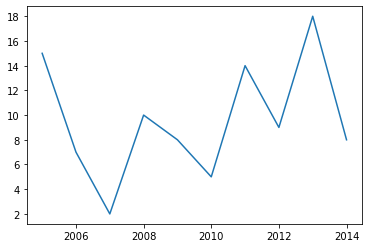

In [6]:
import matplotlib.pyplot as plt

x = list(data.keys())   #x = df.columns
y = list(data.values()) #y = df.values[0]
print(x, type(x))
print(df.columns, type(df.columns))

plt.plot(x, y)
plt.show()

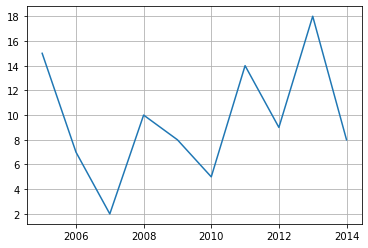

In [7]:
plt.plot(x, y)
plt.grid()   # 그리드 표시, plt.grid(True)

#### 2개의 선그래프와 축 범위 지정

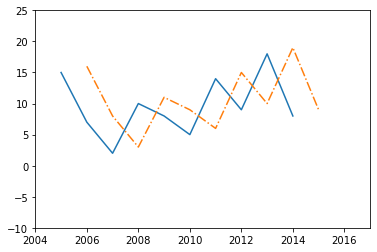

In [8]:
# 여러 개의 그래프 표시
x1 = [i+1 for i in x]
y1 = [i+1 for i in y]

plt.plot(x, y, '-', x1, y1, '-.')
plt.xlim(2004, 2017)   #x축의 범위
plt.ylim(-10, 25)      #y축의 범위
plt.show()


#### 한글 표현

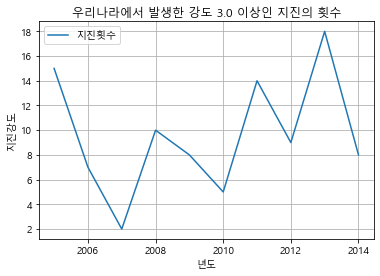

In [9]:
import matplotlib
import matplotlib.pyplot as plt

# 한글출력 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'# '맑은 고딕'으로 설정 
#matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 제목, 레이블, 범례, 
plt.plot(x, y)
plt.title('우리나라에서 발생한 강도 3.0 이상인 지진의 횟수') #제목
plt.xlabel('년도')      # x축 레이블
plt.ylabel('지진강도')  # y축 레이블
plt.grid()             # 격자 표시
plt.legend(['지진횟수']) #범례,기본 위치 : loc='upper left'
plt.show()

#### 2.점그래프

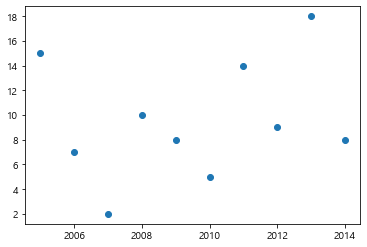

In [10]:
plt.scatter(x, y)
plt.show()

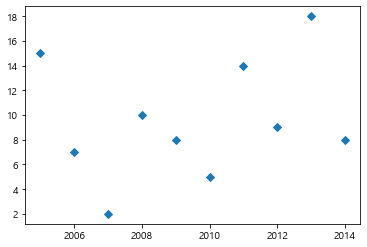

In [11]:
# 선그래프에서 마커 표시
# https://matplotlib.org/stable/api/markers_api.html?highlight=marker#module-matplotlib.markers 

plt.plot(x, y,'D')
plt.show()

#### 3.선+marker 그래프

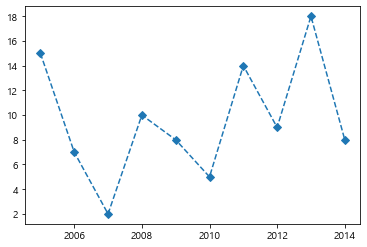

In [12]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html?highlight=linestyle

plt.plot(x, y,'D', linestyle='--')
plt.show()

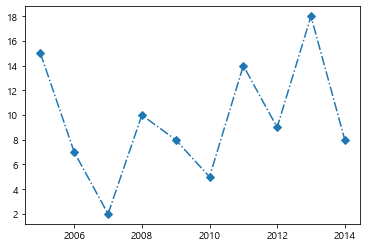

In [13]:
plt.plot(x, y,'D', linestyle='dashdot')

#### 4.막대 그래프

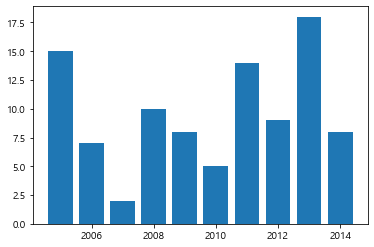

In [14]:
plt.bar(x,y)
plt.show()

#### 가로 막대그래프

ValueError: shape mismatch: objects cannot be broadcast to a single shape

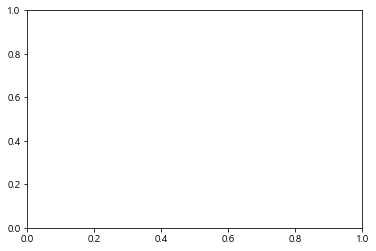

In [27]:
#가로 막대그래프
plt.bar(x,y)
plt.show()

#### 그래프 색상 지정

ValueError: shape mismatch: objects cannot be broadcast to a single shape

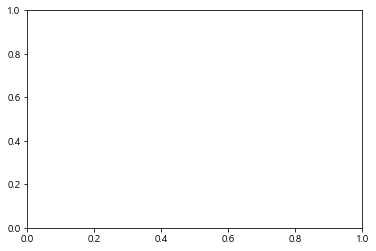

In [28]:
#그래프 색상 지정
colors = ['r','g','b','c','m','y','k','w']  # 기본색상  # Hexa코드 or CSS컬러사용
plt.bar(x,y,color=colors)
plt.show()

#### 막대그래프 + 선그래프

ValueError: shape mismatch: objects cannot be broadcast to a single shape

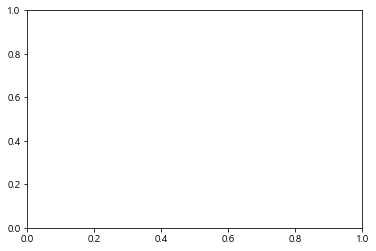

In [29]:
#막대 그래프 + 선그래프
plt.bar(x,y)
plt.plot(x, y,'D', linestyle='dashdot', color='r')
plt.grid()

#### 5. 원(파이) 그래프

Text(0.5, 1.0, '3.0이상 강진 횟수')

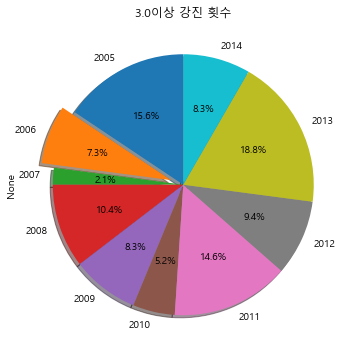

In [30]:
val = [15,7,2,10,8,5,14,9,18,8]
col = list(range(2005,2015,1))

df = pd.Series(val, index=col)

explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0) #조각이 돌출되도록 표현
# df.plot.pie(figsize=(5, 5), explode=explode, autopct='%1.1f%%',
#         shadow=True, startangle=90)

graph = df.plot.pie(figsize=(6, 6), explode=explode, autopct='%1.1f%%', 
            shadow=True, startangle=90)

graph.set_title("3.0이상 강진 횟수")

## 2.질적자료의 정리

### 점도표 만들기

#### 산점도

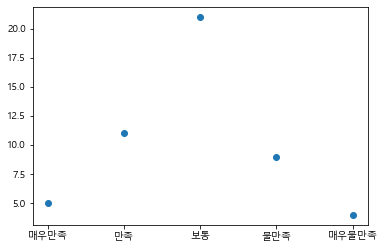

In [31]:
import matplotlib.pyplot as plt 
import numpy as np

index = ['매우만족','만족','보통','불만족','매우불만족']
data = np.array([5,11,21,9,4])

plt.scatter(index, data)  #X:index, Y:data
plt.show()

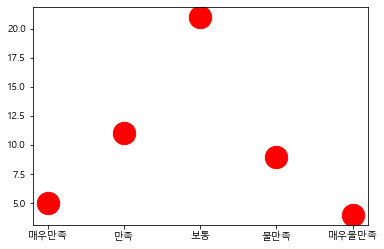

In [32]:
#점 크기 지정
plt.scatter(index, data,  s=500, c='r')  #마커크기: 500, 컬러:red 
plt.show()

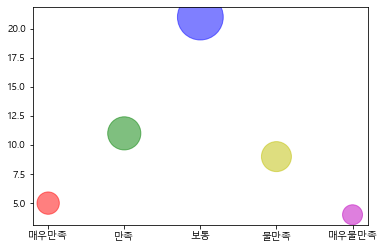

In [33]:
#값에 따라 점 크기, 컬러 다르게 지정
size = data * 100
colors=['r','g','b','y','m'] 
plt.scatter(index, data, s=size, c=colors, alpha=0.5)  
plt.show()

#### 막대 그래프

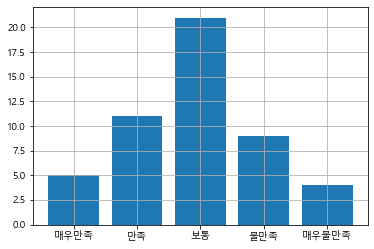

In [34]:
plt.bar(index, data)
plt.grid()

#### Q. 만족도 점도표 표현하기

In [35]:
import matplotlib.pyplot as plt 
import numpy as np

#1.고유한 측정값 찾기
index = ['매우만족','만족','보통','불만족','매우불만족']
data  = np.array([5,11,21,9,4])

#2.계급구간 만들기
x = np.arange(len(index)) + 1  #X축:인덱스
y = np.arange(1, data.max()+1) #Y축:도수
X, Y = np.meshgrid(x,y)        #x,y 평면 범위(격자형태)

#3.점도표 그리기: 
# Y축이 실제값보다 작을 때 까지 찍기
plt.scatter(X,Y, c= Y<=val, cmap="Greys") # c=The marker colors:array-like or list of colors , cmap="Oranges" 조건을 주어 출력해 보기
plt.xlabel('만족도')
plt.xticks(ticks=x, labels=col)  #X축 레이블 지정함
plt.show()

ValueError: operands could not be broadcast together with shapes (21,5) (10,) 

### 도수표 만들기

#### Q.학년별 동아리 회원 수에 대한 도수표 작성하기

In [36]:
import matplotlib.pyplot as plt 
import pandas as pd

index = ['1학년','2학년','3학년','4학년']
data = [16,12,7,5]
df  = pd.DataFrame(data, index=index, columns=['도수'])

df['상대도수']  = [x/sum(data) for x in data]
df['백분율(%)'] = [x/sum(data)*100 for x in data]

df

,도수,상대도수,백분율(%)
1학년,16,0.400,40.0
2학년,12,0.300,30.0
3학년,7,0.175,17.5
4학년,5,0.125,12.5


#### Q.학년별 동아리 회원 수에 대한 막대 그래프

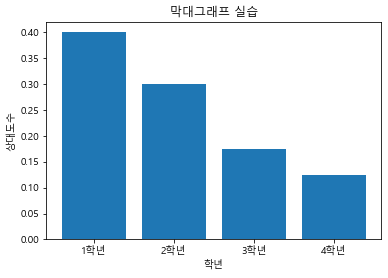

In [37]:
plt.bar(index, df['상대도수'])
plt.title('막대그래프 실습')
plt.xlabel('학년')
plt.ylabel('상대도수')
plt.show()

<AxesSubplot:>

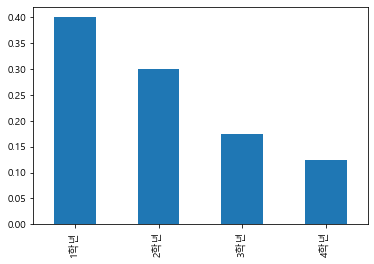

In [38]:
df['상대도수'].plot(kind='bar')

### 꺽은선 그래프

#### Q.성별에 따른 고객 만족도

In [39]:
df  = pd.DataFrame([[3,7,10,4,2],[2,4,11,5,2]], 
                   index=['남자','여자'], 
                   columns=['매우만족','만족','보통','불만족','매우불만족'])
df

,매우만족,만족,보통,불만족,매우불만족
남자,3,7,10,4,2
여자,2,4,11,5,2


<AxesSubplot:>

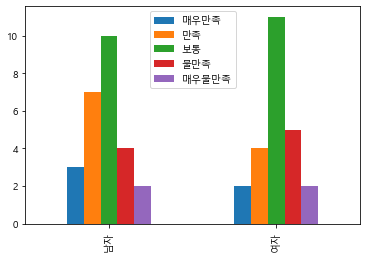

In [40]:
df.plot(kind='bar')

In [41]:
print(df.loc['남자'], type(df.loc['남자']))  # 남자에 해당하는 행 데이터(시리즈 객체)

매우만족      3
만족        7
보통       10
불만족       4
매우불만족     2
Name: 남자, dtype: int64 <class 'pandas.core.series.Series'>


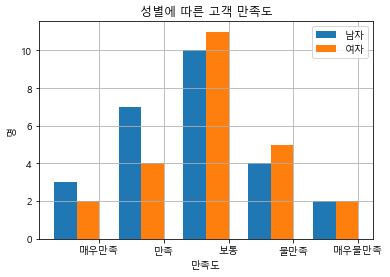

In [42]:
# 막대그래프
x = np.arange(len(df.columns))
width = 0.35

plt.bar(x - width/2, df.loc['남자'], width,label='남자')
plt.bar(x + width/2, df.loc['여자'], width,label='여자')
plt.title('성별에 따른 고객 만족도')
plt.xlabel('만족도')
plt.ylabel('명')
plt.xticks(x + width, df.columns)
plt.grid()
plt.legend()

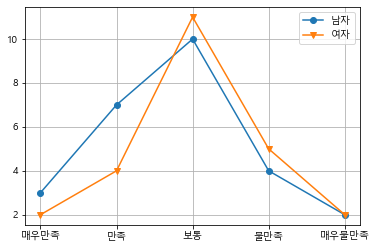

In [43]:
# 꺽은선 그래 프
plt.plot(df.columns, df.loc['남자'], 'o', linestyle='solid', label='남자', )
plt.plot(df.columns, df.loc['여자'], 'v', linestyle='solid', label='여자', )
plt.legend()
plt.grid()

### 비율 그래프

In [44]:
#데이터

idx = ['매우만족','만족','보통','불만족','매우불만족']
val = [5,11,21,9,4]
df  = pd.DataFrame(val, index=idx, columns=['도수'])

df['상대도수']  = [val[x]/sum(val) for x in range(len(val))]
df['백분율(%)'] = [val[x]/sum(val) *100 for x in range(len(val))]

df

,도수,상대도수,백분율(%)
매우만족,5,0.10,10.0
만족,11,0.22,22.0
보통,21,0.42,42.0
불만족,9,0.18,18.0
매우불만족,4,0.08,8.0


In [45]:
df['백분율(%)'].std()

13.564659966250536

#### 원그래프

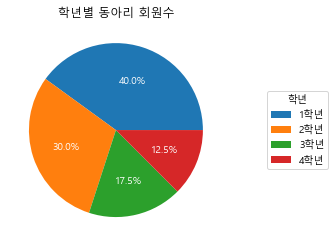

In [46]:
import matplotlib.pyplot as plt 
import pandas as pd

idx = ['1학년','2학년','3학년','4학년']
val = [16,12,7,5]
df  = pd.DataFrame(val, index=idx, columns=['도수'])

df['상대도수']  = [val[x]/sum(val) for x in range(len(val))]
df['백분율(%)'] = [val[x]/sum(val) *100 for x in range(len(val))]

fig, ax = plt.subplots()
ax.pie(df['백분율(%)'], autopct='%1.1f%%',
              textprops=dict(color="w"))
ax.set_title("학년별 동아리 회원수")
ax.legend(idx, title='학년', loc="center right",
          bbox_to_anchor=(1, 0, 0.5, 1))

## 3.양적자료의 정리

숫자료 표현할 수 있는 자료의 정리

### 점도표 표현하기

#### Q.숫자데이터 점도표로 표현하기

In [47]:
import matplotlib.pyplot as plt 
import numpy as np

data = [4.1, 4.2, 3.8, 4.2, 3.9, 4.2, 3.9, 4.1, 3.9, 4.3,
       3.9, 3.8, 3.8, 4.0, 4.3, 3.8, 3.9, 4.1, 4.1, 4.0]

#1.고유한 측정값 찾기
idx = np.unique(data)
val = [data.count(i) for i in idx]

#2.계급구간 만들기
y = np.arange(1, max(val)+1)  #Y축:도수
x = np.arange(len(col)) + 1    #X축:데이터 속성
X, Y = np.meshgrid(x,y)        #x-y 평면 범위(격자형태)

#3.점도표 그리기
plt.figure(figsize=(6,2)) # 그래프 사이즈
plt.scatter(X, Y, c=Y<=val, cmap="Greys")
plt.xticks(ticks=x, labels=col)  #X축 레이블 지정함
plt.show()

ValueError: operands could not be broadcast together with shapes (5,10) (6,) 

<Figure size 432x144 with 0 Axes>

### 도수분포표 만들기

#### Q.핸드폰 사용시간을 계급수 K=5인 도수분포표를 만드시오

In [48]:
#!pip install IPython 
from IPython.display import Image
Image("image/핸드폰_사용시간.png")

FileNotFoundError: No such file or directory: 'image/핸드폰_사용시간.png'

FileNotFoundError: No such file or directory: 'image/핸드폰_사용시간.png'

<IPython.core.display.Image object>

- 올림: math.ceil()  # math 모듈내 함수
- 내림: math.floor() # math 모듈내 함수
- 반올림: round()    # 사사오입

In [8]:
import math 
import numpy as np
import pandas as pd

data = [10,37,22,32,18,15,15,18,22,15,
       20,25,38,28,25,30,20,22,18,22,
       22,12,22,26,22,32,22,23,20,23,
       23,20,25,51,20,25,26,22,26,28,
       28,20,23,30,12,22,35,11,20,25]

k = 5    #계급의 수
start = min(data)-0.5   #계급간격 시작값
step = math.ceil((max(data)-min(data))/k)  #계급의 간격
bins = np.arange(min(data)-0.5, max(data), step=step)  #계급

#계급구간
index = [ str(bins[i])+'~'+str(bins[i+1] 
                            if i<(len(bins)-1) else np.max(bins)+step ) 
        for i in range(len(bins))]    #계급구간
#도수 데이터
bins = np.append(bins, np.array([np.max(bins) + step]))
hist, bins = np.histogram(data, bins)
val = hist
print(val)

# 도수분포표 만들기
#,'상대도수','누적도수','누적상대도수','계급값']
df = pd.DataFrame(val, index=index, columns=['도수'])
df.index.name = '계급간격'

df['상대도수'] = [i/sum(val) for i in val]
df['누적도수'] = [sum([val[x] for x in range(i+1)]) for i in range(len(val))]

val2 = df['상대도수'].values

df['누적상대도수'] = [sum([val2[i] for i in range(x+1)]) for x in range(k)]
df['계급값'] = [ (bins[x]+bins[x+1])/2 for x in range(k)]

df.loc['합계'] = [sum(val),sum(val2),'','','']
#df.loc['합계'] = df.iloc[:,:2].sum(axis=0, skipna=True)

df

[10 29  8  2  1]


,도수,상대도수,누적도수,누적상대도수,계급값
계급간격,,,,,
9.5~18.5,10,0.20,10,0.2,14
18.5~27.5,29,0.58,39,0.78,23
27.5~36.5,8,0.16,47,0.94,32
36.5~45.5,2,0.04,49,0.98,41
45.5~54.5,1,0.02,50,1,50
합계,50,1.00,,,


### 히스토그램

도수분포표로 작성한 자료를 시각적으로 쉽게 이해할 수 있도록 그린 그림

#### Q.청소년 1주일 동안의 핸드폰 사용시간을 계급수 K=5인 히스토그램

모집단: 50


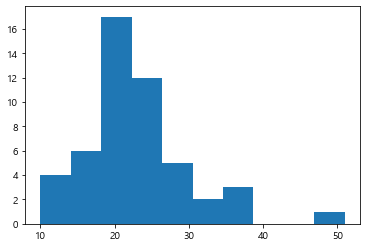

In [50]:
import matplotlib.pyplot as plt
import numpy as np

data = [10,37,22,32,18,15,15,18,22,15,
       20,25,38,28,25,30,20,22,18,22,
       22,12,22,26,22,32,22,23,20,23,
       23,20,25,51,20,25,26,22,26,28,
       28,20,23,30,12,22,35,11,20,25]

print(f'모집단: {len(data)}')
plt.hist(data)
plt.show()

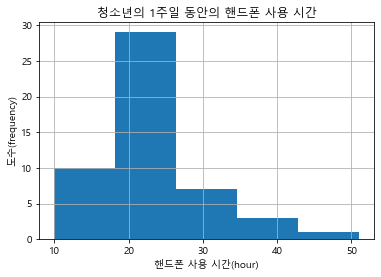

In [51]:
# 계급 수를 지정하여 히스토그램 그리기
k = 5   #계급의 수

plt.hist(data, bins=k)
plt.grid()
plt.xlabel('핸드폰 사용 시간(hour)')
plt.ylabel('도수(frequency)')
plt.title('청소년의 1주일 동안의 핸드폰 사용 시간')
plt.show()

#### 막대 그래프로 히스토그램 그리기

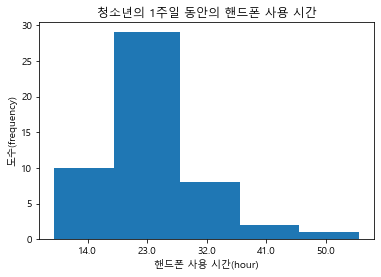

In [52]:
x = df['계급값'].values[:5]
y = df['도수'].values[:5]
plt.bar(x,y, width=10)
plt.xticks(ticks=x, labels=x)
plt.xlabel('핸드폰 사용 시간(hour)')
plt.ylabel('도수(frequency)')
plt.title('청소년의 1주일 동안의 핸드폰 사용 시간')
plt.show()

#### Q.3-9 예제 계급수 K=5인 히스토그램

In [52]:
import math 
import numpy as np
import pandas as pd

data = [26,31,28,38,41,26,18,16,25,29,
       39,38,38,40,43,38,39,41,41,40,
       26,19,39,28,43,34,21,41,29,30,
       12,22,45,34,29,26,29,58,42,16,
       41,42,38,42,28,42,39,41,39,43]

k = 5   #계급의 수
start = min(data)-0.5   #계급간격 시작값
step = math.ceil((max(data)-min(data))/5)  #계급의 간격
bins = np.arange(min(data)-0.5, max(data), step=step)  #계급

#계급구간
idx = [ str(bins[i])+'~'+str(bins[i+1] 
            if i<(len(bins)-1) else np.max(bins)+step ) 
           for i in range(len(bins))]    #계급구간
#도수 데이터
bins = np.append(bins, np.array([np.max(bins) + step]))
hist, bins = np.histogram(data, bins)
val = hist

# 도수분포표 만들기
#,'상대도수','누적도수','누적상대도수','계급값']
df = pd.DataFrame(val, index=idx, columns=['도수'])
df.index.name = '계급간격'

df['상대도수'] = [val[x]/sum(val) for x in range(k)]
df['누적도수'] = [sum([val[i] for i in range(x+1)]) for x in range(k)]

val2 = df['상대도수'].values

df['누적상대도수'] = [sum([val2[i] for i in range(x+1)]) for x in range(k)]
df['계급값'] = [ (bins[x]+bins[x+1])/2 for x in range(k)]

A = df['계급값'].values
B = (sum(A[x] * val[x] for x in range(k)) / len(data)) #평균
C = sum((A[x] - B)**2*val[x] for x in range(k)) / 49 # 분산

df['편차'] = [(A[x] - B) for x in range(k)]
df['편차^2'] = [(A[x] - B)**2 for x in range(k)]
df['편차^2*도수'] = [(A[x] - B)**2*val[x] for x in range(k)]
val3 = df['편차^2*도수'].values


#df.loc['합계'] = df.iloc[:,:2].sum(axis=0, skipna=True)
df.loc['합계'] = [sum(val),sum(val2),'','','','','',sum(val3)]

print("분산: ", np.round(C, 2))
df

분산:  92.29


,도수,상대도수,누적도수,누적상대도수,계급값,편차,편차^2,편차^2*도수
계급간격,,,,,,,,
11.5~21.5,6,0.12,6,0.12,16.5,-16.6,275.56,1653.36
21.5~31.5,15,0.30,21,0.42,26.5,-6.6,43.56,653.40
31.5~41.5,20,0.40,41,0.82,36.5,3.4,11.56,231.20
41.5~51.5,8,0.16,49,0.98,46.5,13.4,179.56,1436.48
51.5~61.5,1,0.02,50,1,56.5,23.4,547.56,547.56
합계,50,1.00,,,,,,4522.00


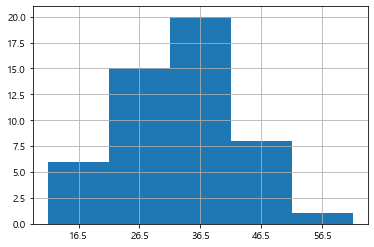

In [54]:
x = df['계급값'].values[:5]
y = df['도수'].values[:5]
plt.bar(x,y, width=10)
plt.xticks(ticks=x, labels=x)
plt.grid()
plt.show()

### 도수다각형 그리기

히스토그램에서 연속적인 막대의 상단 중심부를 선분으로 연결하여 다각형으로 표현한 그림

#### 히스토그램 위에 도수다각형 그리기

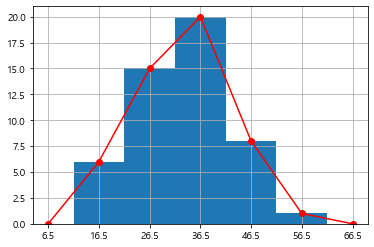

In [55]:
x = df['계급값'].values[:5]
y = df['도수'].values[:5]

# 선그래프의 점의 시작과 끝 추가하기
z = np.zeros(1)
xa= np.array([x[0]-(x[1]-x[0])])
xb= np.array([x[-1]+(x[1]-x[0])])
x1= np.hstack([np.hstack([xa,x]),xb])
y1= np.hstack([np.hstack([z,y]),z])

plt.bar(x,y, width=10)
plt.plot(x1, y1, 'o', linestyle='solid', c='r')
plt.xticks(ticks=x1, labels=x1)
plt.grid()
plt.show()

### 줄기-잎 그림

#### 방법1: stemgraphic 라이브러리 이용

(<Figure size 540x144 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x12bbb47e790>)

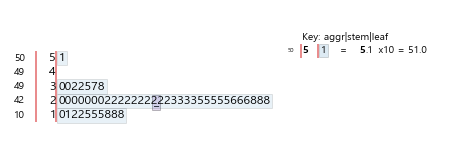

In [56]:
!pip install stemgraphic  

import stemgraphic

data = [10,37,22,32,18,15,15,18,22,15,
       20,25,38,28,25,30,20,22,18,22,
       22,12,22,26,22,32,22,23,20,23,
       23,20,25,51,20,25,26,22,26,28,
       28,20,23,30,12,22,35,11,20,25]

stemgraphic.stem_graphic(data, scale=10)

#### 방법2: pyplot.stem 이용

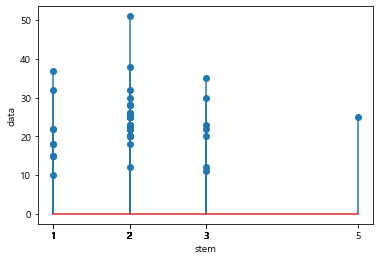

In [57]:
data = [10,37,22,32,18,15,15,18,22,15,
       20,25,38,28,25,30,20,22,18,22,
       22,12,22,26,22,32,22,23,20,23,
       23,20,25,51,20,25,26,22,26,28,
       28,20,23,30,12,22,35,11,20,25]

stems = [i//10 for i in data]
stems.sort()
plt.stem(stems, data)
plt.xlabel('stem')
plt.ylabel('data')
plt.xticks(ticks=stems, label=stems)
plt.show()